In [1]:
!pip3 install NewsSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.0/919.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [3]:
from NewsSentiment import TargetSentimentClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
tsc = TargetSentimentClassifier()
vader_analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 584M/584M [00:09<00:00, 64.4MB/s]


# Load Data

In [5]:
import numpy as np
import pandas as pd
import spacy
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [6]:
df = pd.read_csv('Ukraine_v2_preprocessed.csv', encoding='latin-1')
df.head()

,article_title,author,published_time,article_text
0,"NATO, US put Ukraineâs EU membership in dilemma",By Global Times,"Published: Jun 22, 2022 11:21 PM",Illustration: Chen Xian/Global TimesUkraine is...
1,Xi offers answers to questions of the times at...,By \n\n\n\n\n Yang Sheng \nYang Sheng is a chi...,"Published: Jun 23, 2022 12:07 AM",China President Xi Jinping delivers a keynote ...
2,Wild ambition of NATO against publicâs will,By Lu Xue,"Published: Jun 23, 2022 12:23 AM",Illustration: Liu Rui/Global TimesEditor's Not...
3,Egyptian Red Sea resort Sharm el-Sheikh reels ...,By Reuters,"Published: Jun 23, 2022 04:10 PM","A picture taken on September 29, 2021 shows Ru..."
4,BRICS provides new voices in transformative world,By Santiago Bustelo,"Published: Jun 23, 2022 05:04 PM",Illustration: Chen Xia/GTIn the last decade th...


In [ ]:
df.shape

(1611, 4)

In [7]:
#check and remove incomplete data
check_condition = (df['article_text'] == 'Article text not found') & (df['author'] == 'Author not found')
df = df[~check_condition]

In [8]:
df['published_time'] = df['published_time'].str.replace('Published: ', '')
df['published_time'] = pd.to_datetime(df['published_time'], format='%b %d, %Y %I:%M %p')
df['published_time'].head()

,published_time
0,2022-06-22 23:21:00
1,2022-06-23 00:07:00
2,2022-06-23 00:23:00
3,2022-06-23 16:10:00
4,2022-06-23 17:04:00


In [ ]:
#define the number of chunks
#num_chunks = 10

#split the dataset into 10 equal parts
#chunks = np.array_split(df, num_chunks)

#save each chunk into a separate CSV file so you can load and process them separately
#for i, chunk in enumerate(chunks):
#    chunk.to_csv(f'data_chunk_{i+1}.csv', index=False)
#    print(f"Chunk {i+1} saved.")

# Pre-processing

In [11]:
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [12]:
#split each article into sentences
def split_into_sentences(article):
    doc = nlp(article)
    return [sent.text for sent in doc.sents]

In [13]:
target_entities = [
    "Russia", "Moscow", "China", "Beijing", "Ukraine",
    "Kiev", "US", "France", "West", "Joe Biden",
    "Xi Jinping", "Vladimir Putin", "Wang Yi", "Antony Blinken", "Volodymyr Zelensky",
    "Donald Trump", "Emmanuel Macron", "EU", "EU Commision", "EU Council",
    "NATO", "UN", "Covid-19", "Cold War"
]

# Sentiment Analysis

In [14]:
#vader
def vader_sentiment(text):
    scores = vader_analyzer.polarity_scores(text)
    #define the thresholds to categorize it
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [15]:
#initialize lists for comparison results
vader_results = []
tsc_results = []

In [16]:
#threshold max sentence length
MAX_SENTENCE_LENGTH = 100

for idx, row in df.iterrows():
    article_text = row['article_text']
    sentences = split_into_sentences(article_text)

    for sentence in sentences:
        original_sentence = sentence
        sentence = sentence.lower()

        #skip sentences that exceed the maximum length threshold
        if len(sentence.split()) > MAX_SENTENCE_LENGTH:
            print(f"Skipping long sentence.")
            continue

        #TSC Sentiment Analysis
        for target in target_entities:
            if target.lower() in sentence:
                entity_start = sentence.find(target.lower())
                entity_end = entity_start + len(target)
                left_context = sentence[:entity_start]
                right_context = sentence[entity_end:]

                try:
                    sentiment_tsc = tsc.infer_from_text(left_context, target, right_context)
                except TargetNotFoundException:
                    print(f"TargetNotFoundException: {target} not found in {sentence}")
                    continue #move on to the next target

                sentiment_label_tsc = sentiment_tsc[0]['class_label'].lower()

                #store TSC result
                tsc_results.append({
                    'Model': 'TSC',
                    'Sentence': original_sentence,
                    'Target': target,
                    'Sentiment': sentiment_label_tsc,
                    'published_time': row['published_time']
                })

        #VADER (general sentiment analysis for the entire sentence)
        sentiment_vader = vader_sentiment(sentence)

        #store VADER result
        vader_results.append({
            'Model': 'VADER',
            'Sentence': original_sentence,
            'Sentiment': sentiment_vader,
            'published_time': row['published_time']
        })

Processing batches: 100%|██████████| 1/1 [00:00<00:00, 12.63batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00, 11.91batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00, 10.40batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00,  9.47batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00, 10.00batch/s]


Skipping long sentence.


Processing batches: 100%|██████████| 1/1 [00:00<00:00, 15.13batch/s]


In [ ]:
#convert both results to DataFrames
tsc_results_df = pd.DataFrame(tsc_results)
vader_results_df = pd.DataFrame(vader_results)

In [ ]:
#save results
tsc_results_df.to_excel('tsc_sentiment_results.xlsx', index=False)
vader_results_df.to_excel('vader_sentiment_results.xlsx', index=False)

# Visualization

## Overall Sentiment Distribution

In [ ]:
#aggregate sentiment counts for TSC
tsc_sentiment_counts = tsc_results_df['Sentiment'].value_counts()

#aggregate sentiment counts for VADER
vader_sentiment_counts = vader_results_df['Sentiment'].value_counts()

In [ ]:
sentiment_comparison = pd.DataFrame({
    'Negative': [tsc_sentiment_counts.get('negative', 0), vader_sentiment_counts.get('negative', 0)],
    'Neutral': [tsc_sentiment_counts.get('neutral', 0), vader_sentiment_counts.get('neutral', 0)],
    'Positive': [tsc_sentiment_counts.get('positive', 0), vader_sentiment_counts.get('positive', 0)]
}, index=['TSC', 'VADER'])

sentiment_comparison

,Negative,Neutral,Positive
TSC,13420,45950,9247
VADER,12973,10309,13865


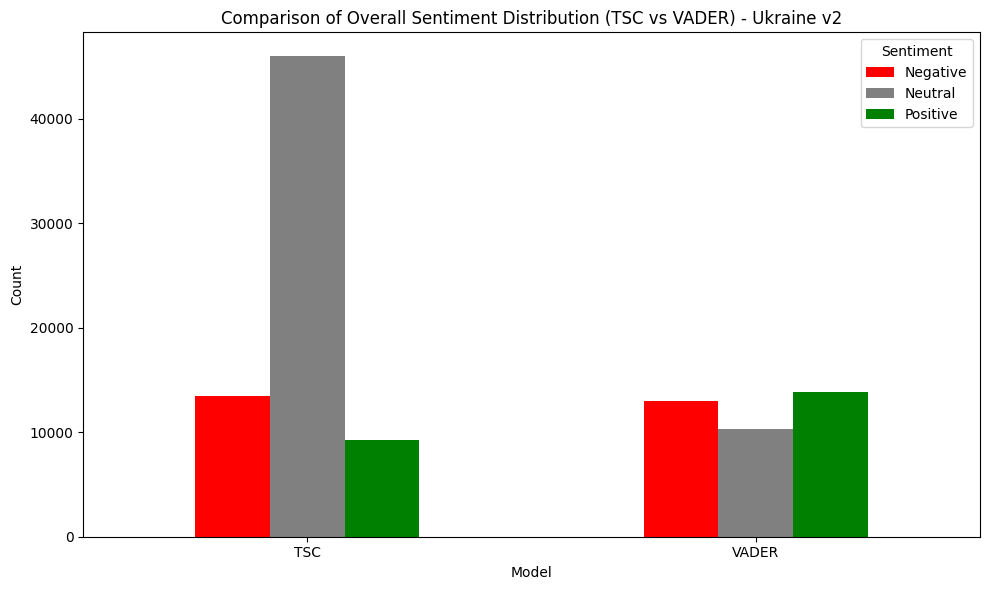

In [ ]:
sentiment_comparison.plot(kind='bar', color=['red', 'gray', 'green'], figsize=(10, 6))
plt.title('Comparison of Overall Sentiment Distribution (TSC vs VADER) - Ukraine v2')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.show()

## Sentiment Over Time Comparison

In [ ]:
#process TSC results by month
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
tsc_sentiment_counts = tsc_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#normalize TSC sentiment proportions
tsc_sentiment_proportions = tsc_sentiment_counts.div(tsc_sentiment_counts.sum(axis=1), axis=0)

In [ ]:
#tsc_sentiment_proportions

In [ ]:
#process VADER results by month
vader_results_df['month'] = vader_results_df['published_time'].dt.to_period('M')  # Convert date to monthly periods
vader_sentiment_counts = vader_results_df.pivot_table(
    index=['month'],  #group by month
    columns='Sentiment',
    aggfunc='size',
    fill_value=0
)

In [ ]:
#vader_sentiment_counts

In [ ]:
#normalize VADER sentiment proportions
vader_sentiment_proportions = vader_sentiment_counts.div(vader_sentiment_counts.sum(axis=1), axis=0)

<Figure size 1200x600 with 0 Axes>

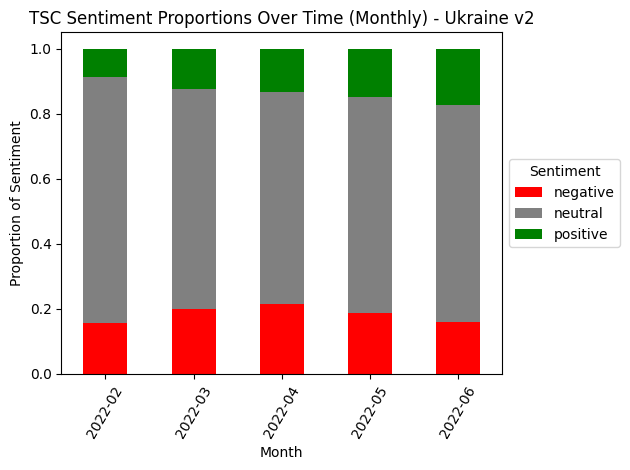

In [ ]:
#Plot 1: TSC Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
tsc_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('TSC Sentiment Proportions Over Time (Monthly) - Ukraine v2')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

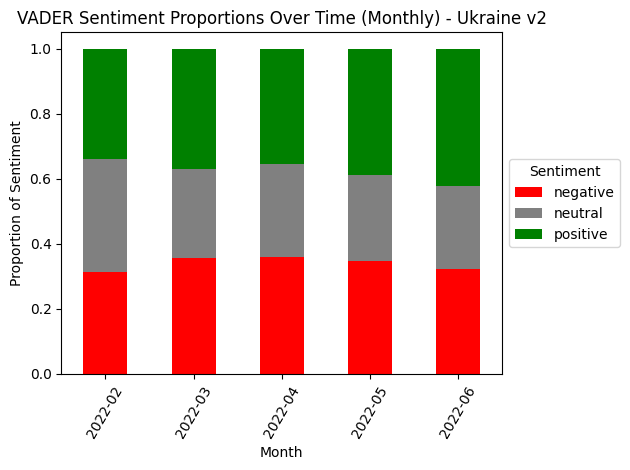

In [ ]:
#Plot 2: VADER Sentiment Proportions Over Time (Monthly)
plt.figure(figsize=(12, 6))
vader_sentiment_proportions.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('VADER Sentiment Proportions Over Time (Monthly) - Ukraine v2')
plt.xlabel('Month')
plt.ylabel('Proportion of Sentiment')
plt.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

## Word Clouds

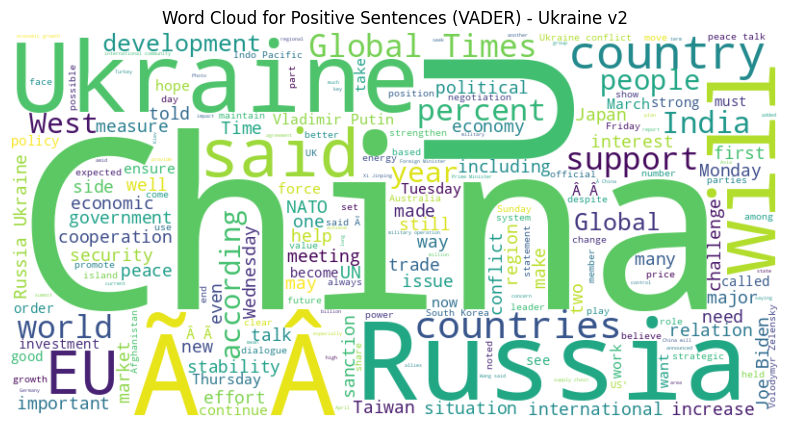

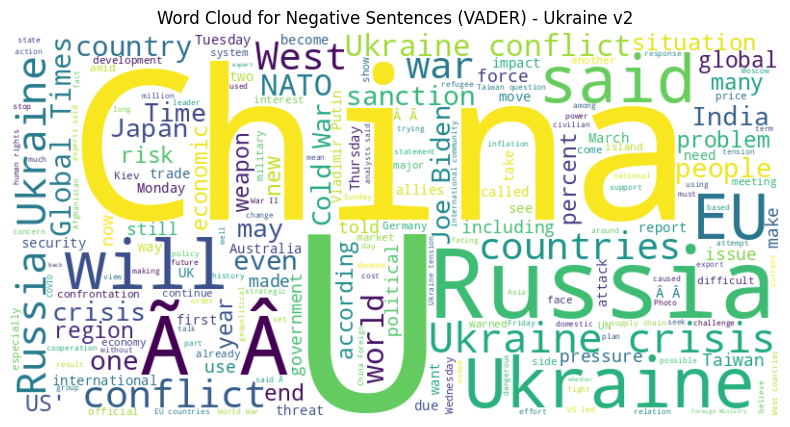

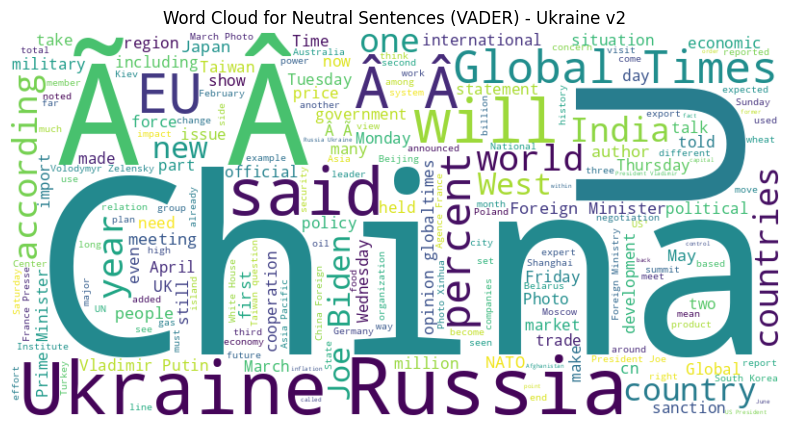

In [ ]:
#generate word cloud for VADER sentiment (positive, negative, neutral)
def wc_vader(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (VADER) - Ukraine v2')
        plt.show()

wc_vader('positive', vader_results_df)
wc_vader('negative', vader_results_df)
wc_vader('neutral', vader_results_df)


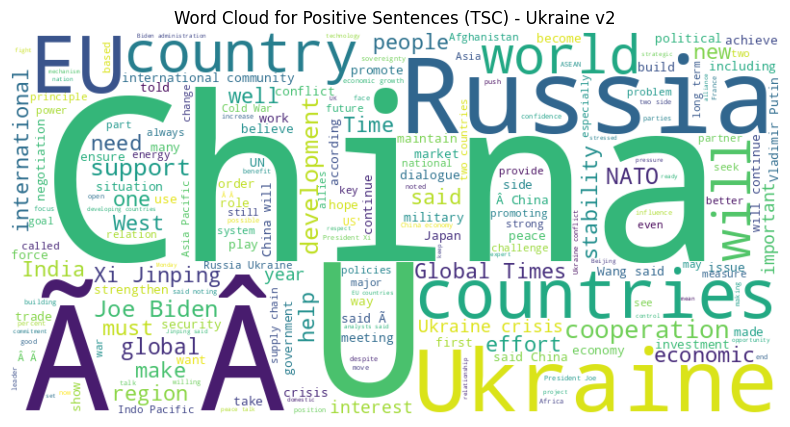

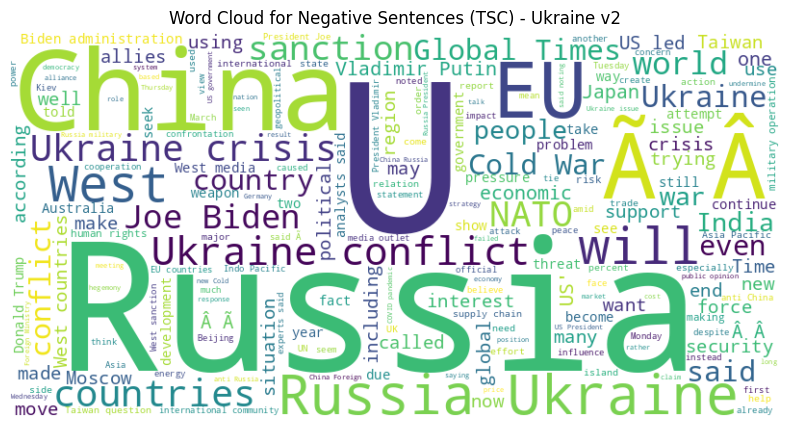

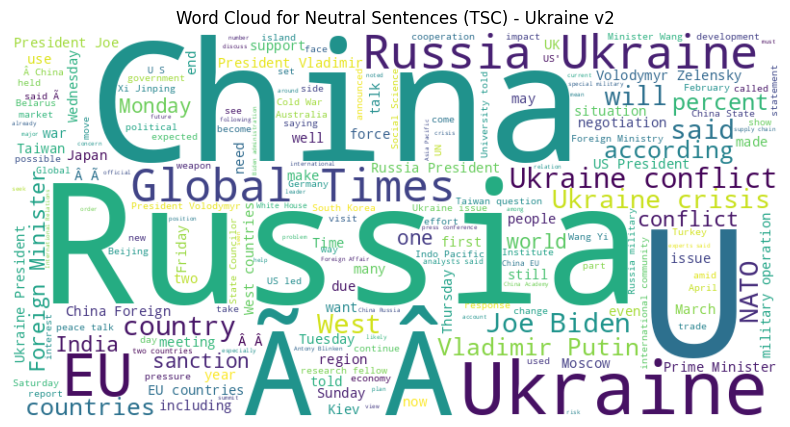

In [ ]:
#generate word cloud for TSC sentiment (positive, negative, neutral)
def wc_tsc(sentiment_label, df):
    sentences = " ".join(df[df['Sentiment'] == sentiment_label]['Sentence'])

    if sentences:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentences)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentences (TSC) - Ukraine v2')
        plt.show()

wc_tsc('positive', tsc_results_df)
wc_tsc('negative', tsc_results_df)
wc_tsc('neutral', tsc_results_df)

## Targeted Sentiment Analysis Visualization using TSC

In [ ]:
#overall sentiment distribution per target
#group by target and sentiment, count the occurrences
overall_sentiment_per_target = tsc_results_df.groupby(['Target', 'Sentiment']).size().unstack(fill_value=0)
print(overall_sentiment_per_target )

#calculate sentiment proportions per target
overall_sentiment_per_target_proportion = overall_sentiment_per_target.div(overall_sentiment_per_target.sum(axis=1), axis=0)
overall_sentiment_per_target_proportion['Overall Sentiment'] = overall_sentiment_per_target_proportion[['positive', 'negative', 'neutral']].idxmax(axis=1)
print(overall_sentiment_per_target_proportion)

overall_sentiment_per_target_proportion.to_excel('overall_sentiment_per_target.xlsx')

Sentiment           negative  neutral  positive
Target                                         
Antony Blinken            13       89        25
Beijing                   39      355        38
China                   1605     5765      2324
Cold War                 281      124        13
Covid-19                 107      500        65
Donald Trump             110       28        14
EU                       261     2829       359
EU Council                 0       39         0
Emmanuel Macron            7       52        11
France                    15      440        52
Joe Biden                290      386       315
Kiev                      37      327        29
Moscow                   109      259        16
NATO                     420      944       178
Russia                  3908     2387       371
UN                      1205    10005      2316
US                      3320    13673      2496
Ukraine                  991     5482       186
Vladimir Putin           161      307   

<Figure size 1200x800 with 0 Axes>

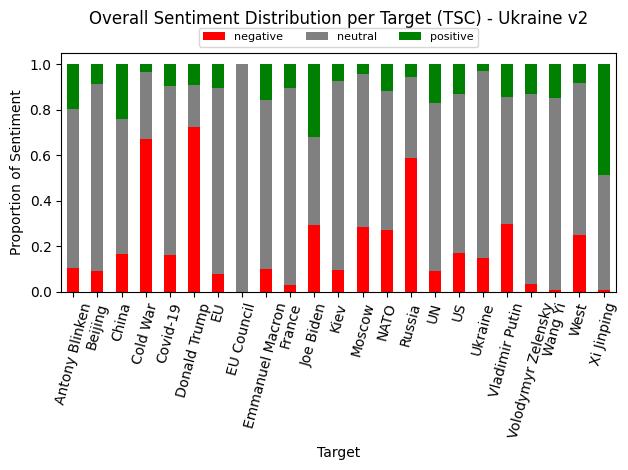

In [ ]:
#plot the stacked bar chart for overall sentiment distribution per target
plt.figure(figsize=(12, 8))
overall_sentiment_per_target_proportion.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'])
plt.title('Overall Sentiment Distribution per Target (TSC) - Ukraine v2\n')
plt.xlabel('Target')
plt.ylabel('Proportion of Sentiment')
plt.xticks(rotation=75)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

## Visualization Sentiment Overtime for Target

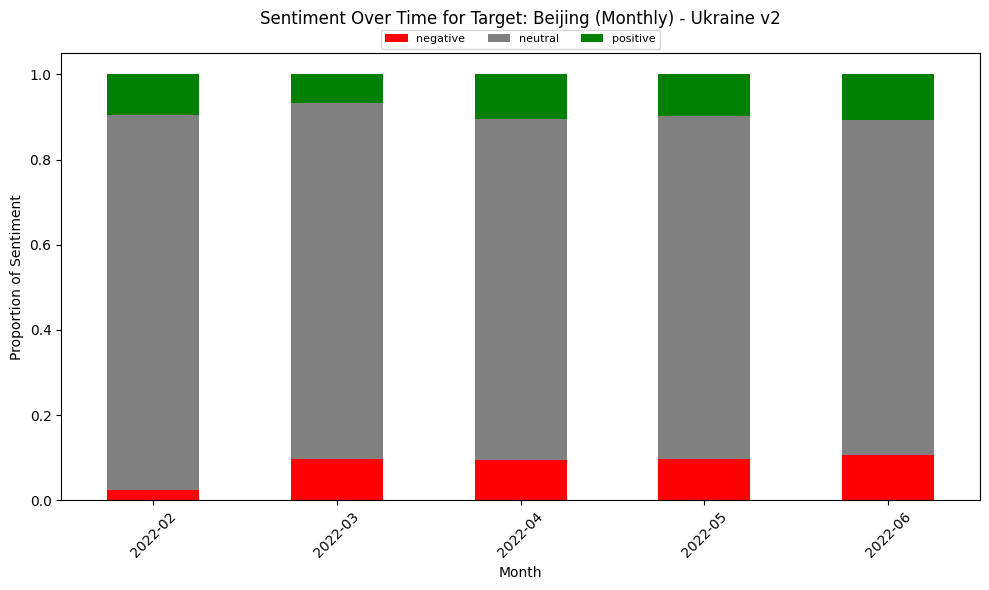

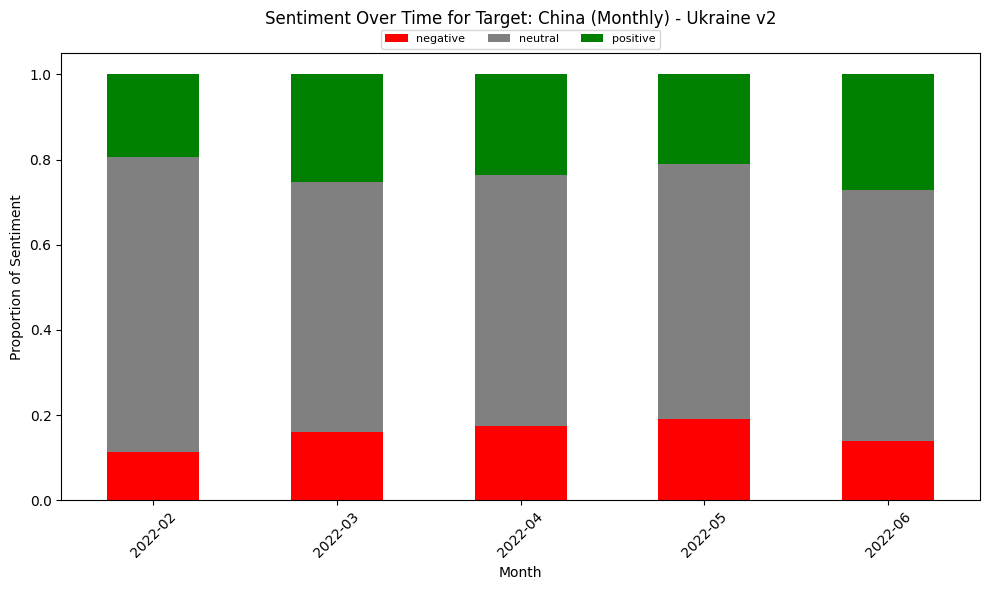

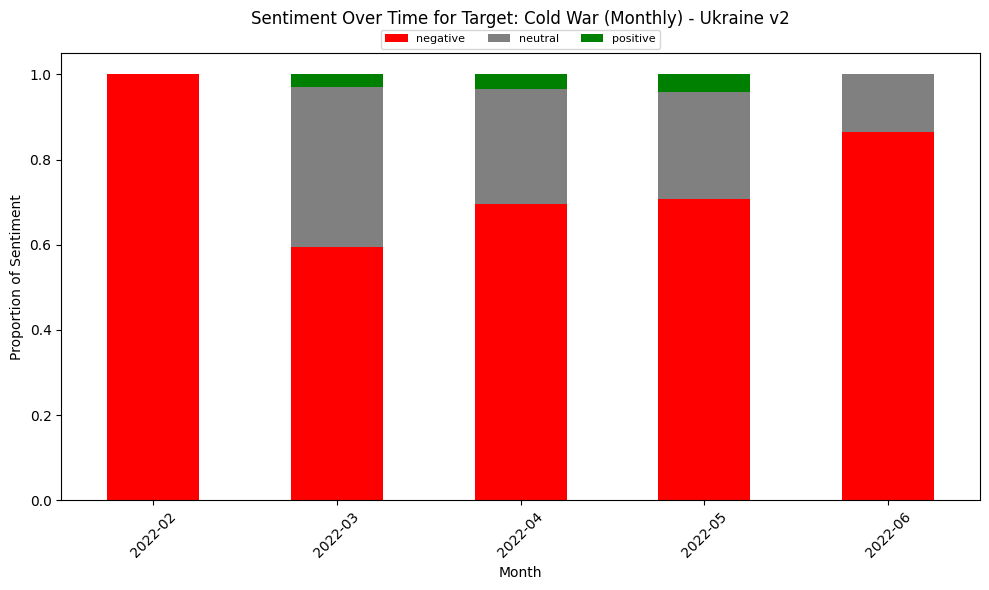

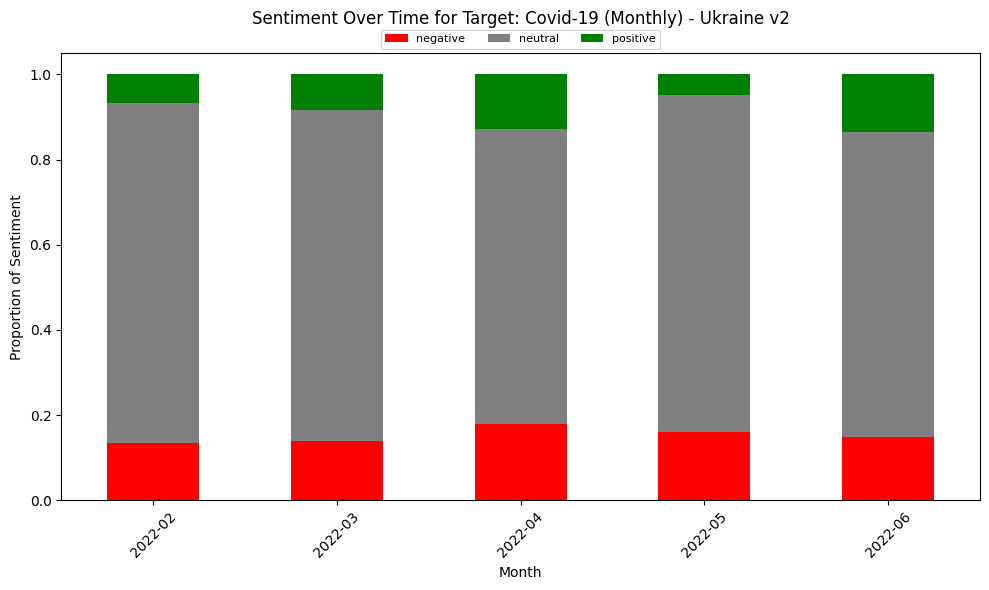

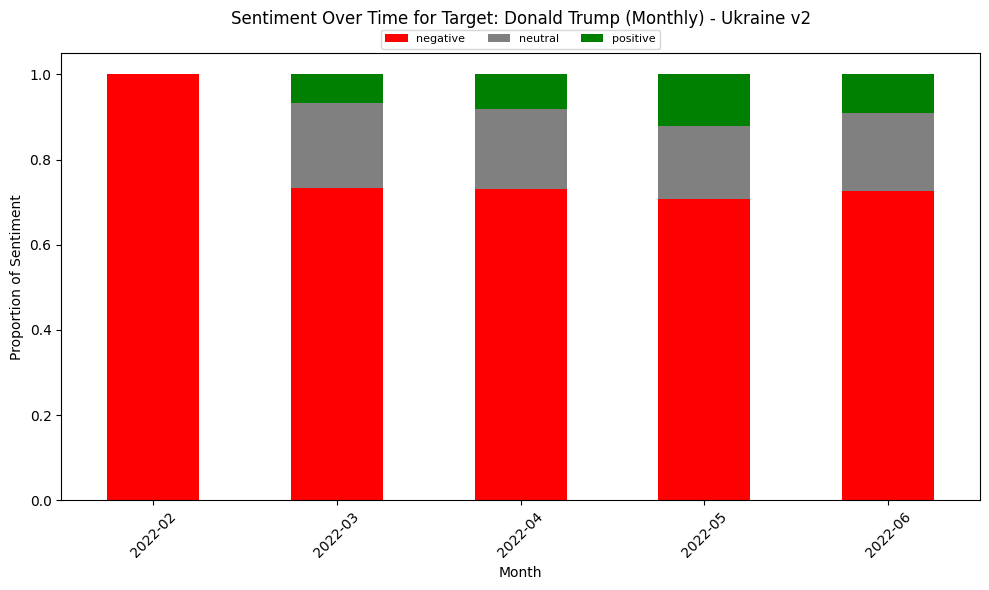

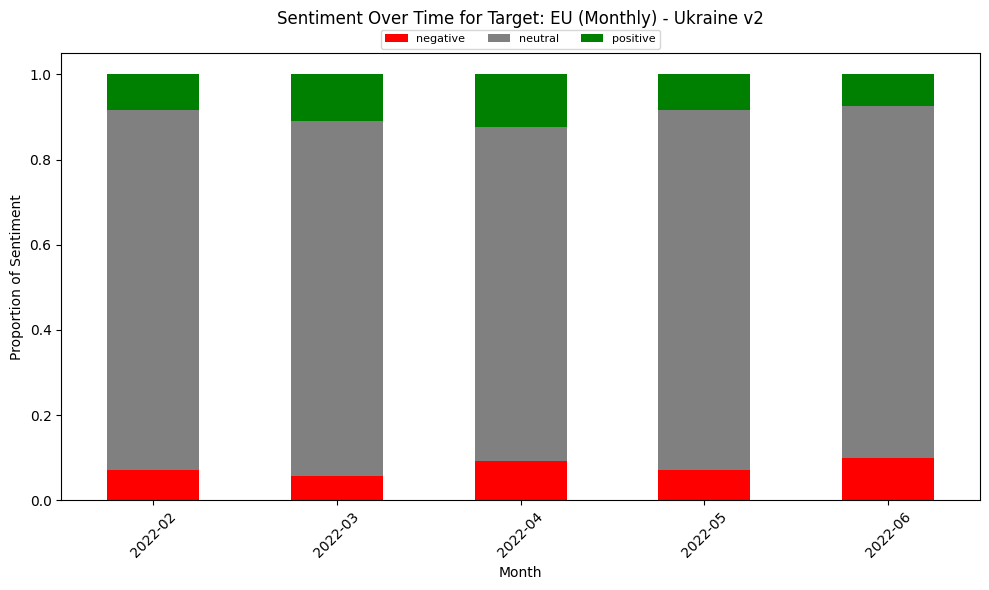

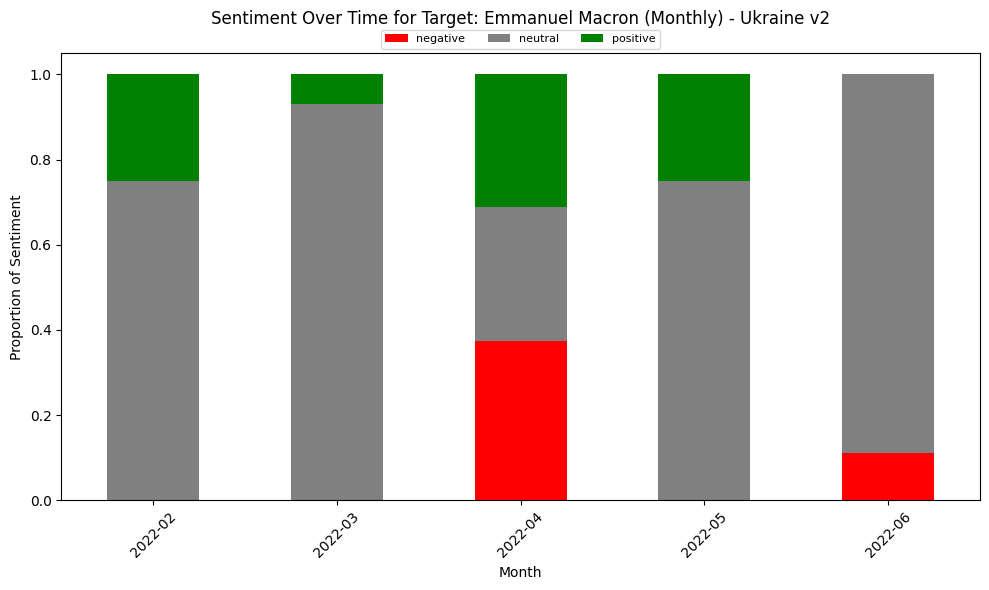

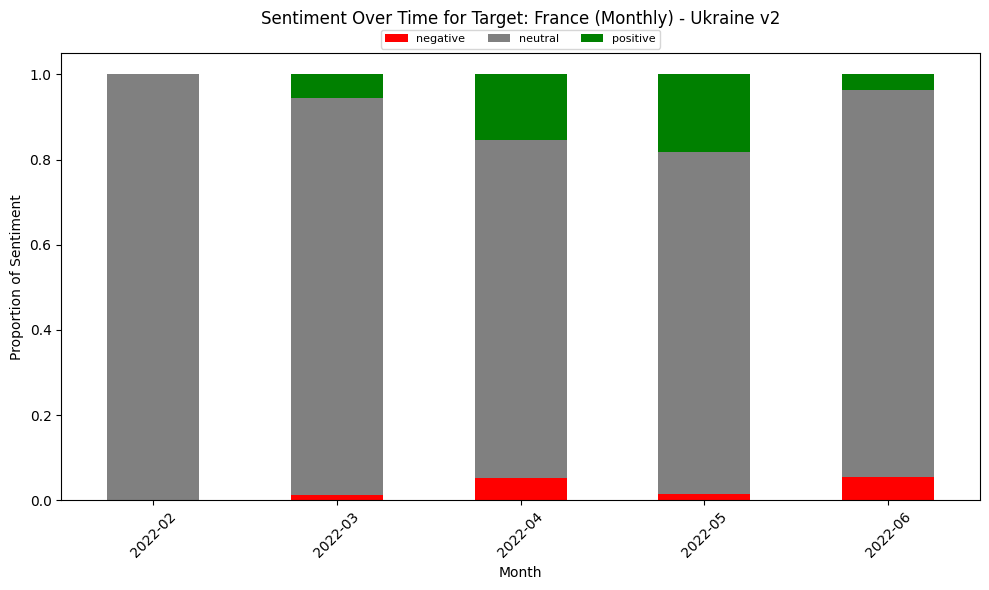

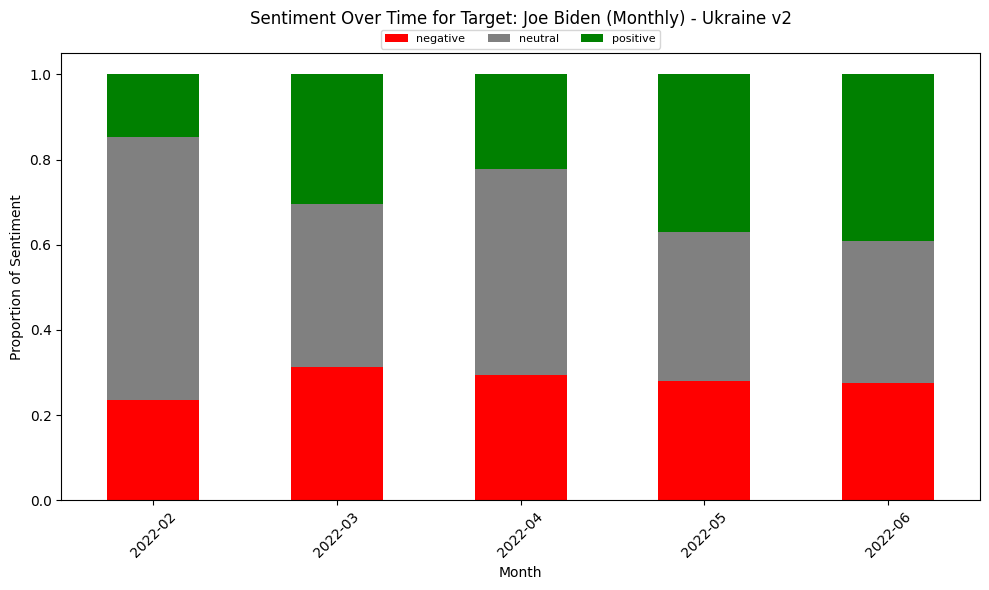

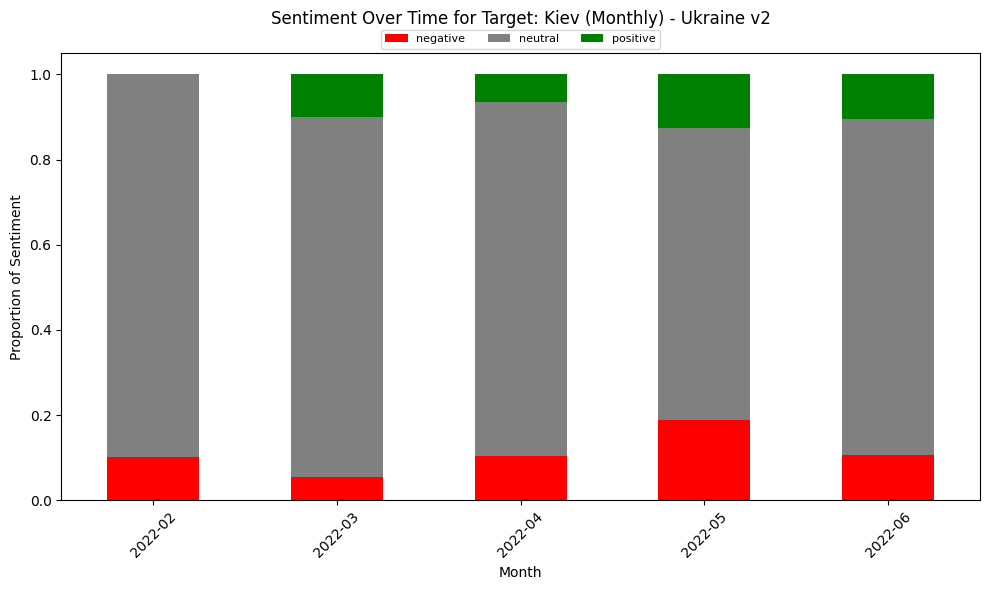

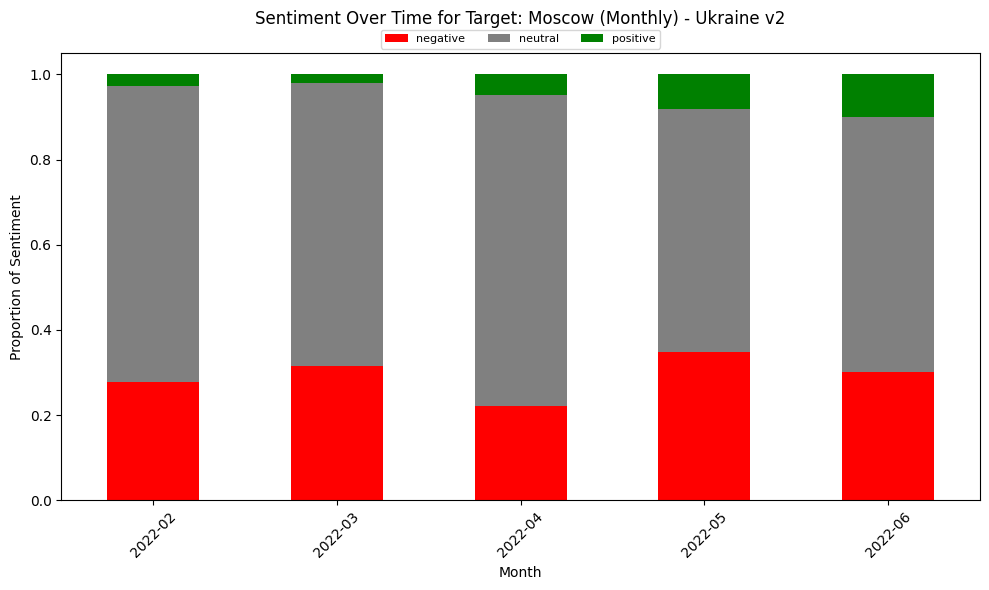

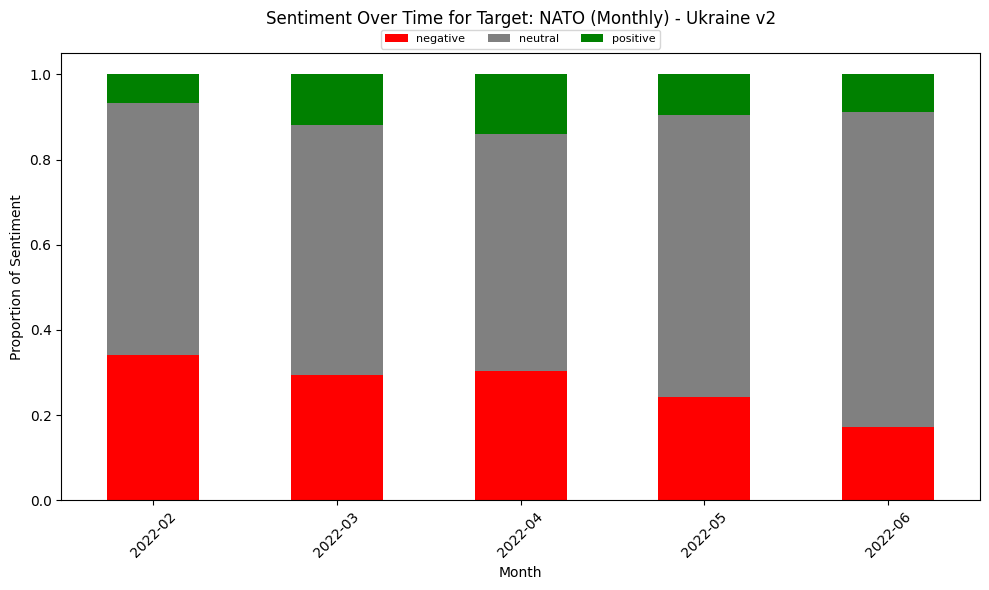

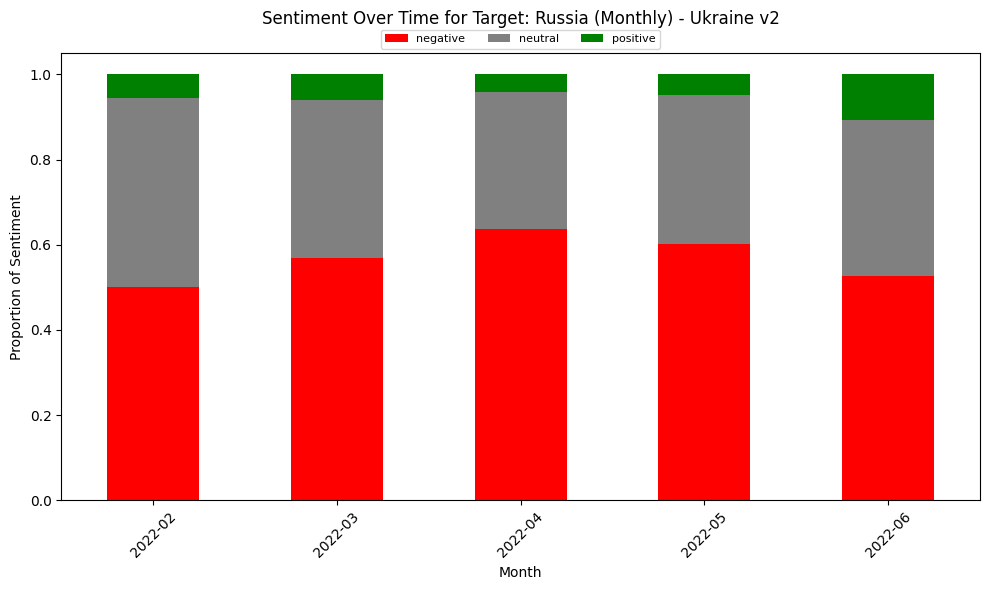

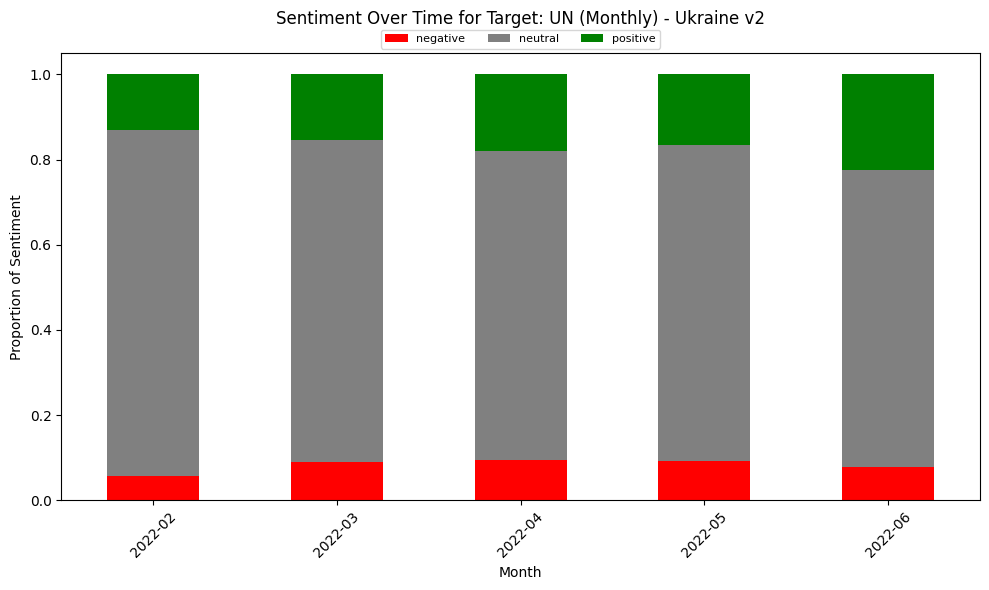

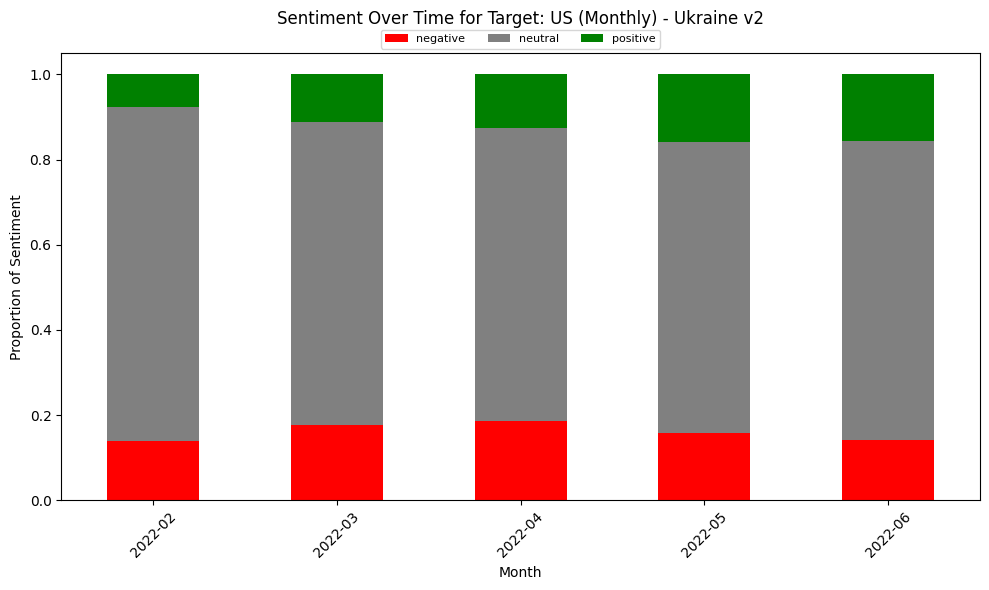

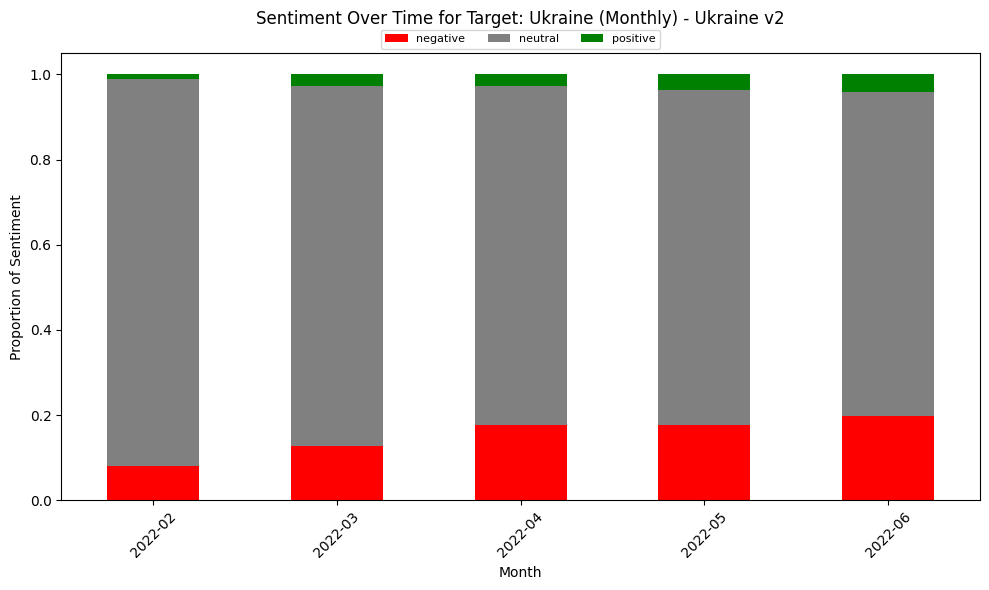

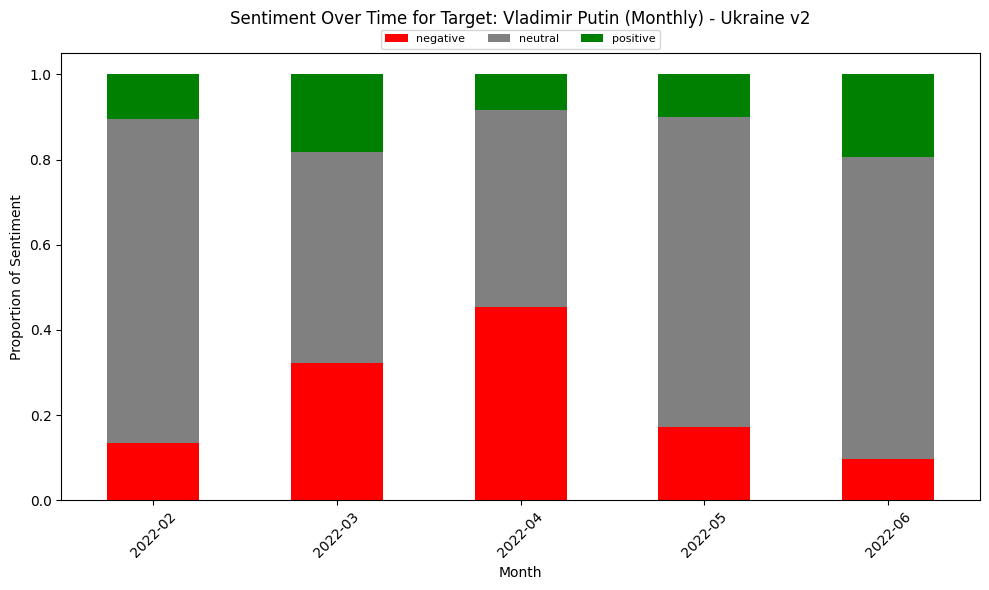

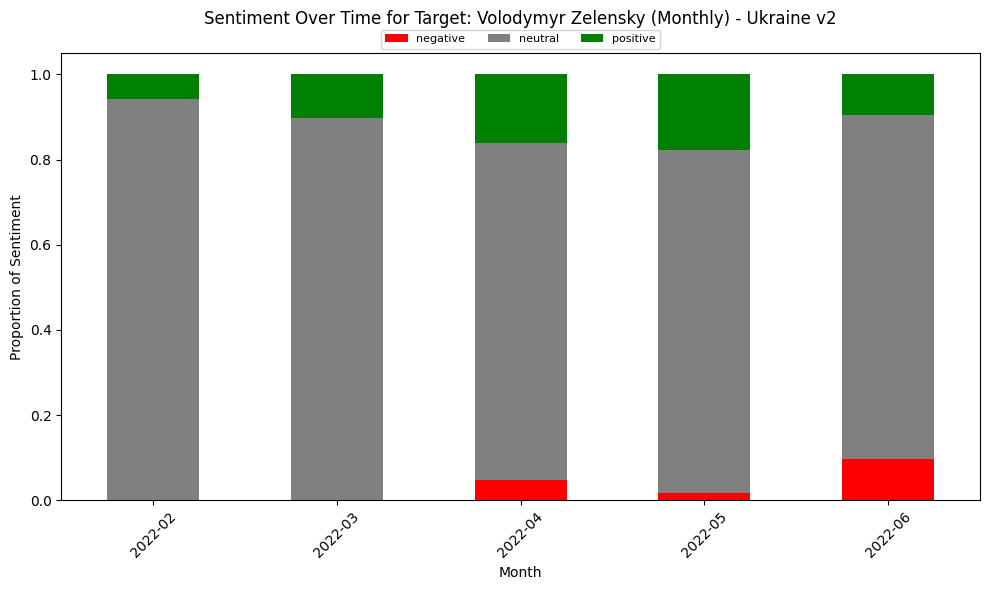

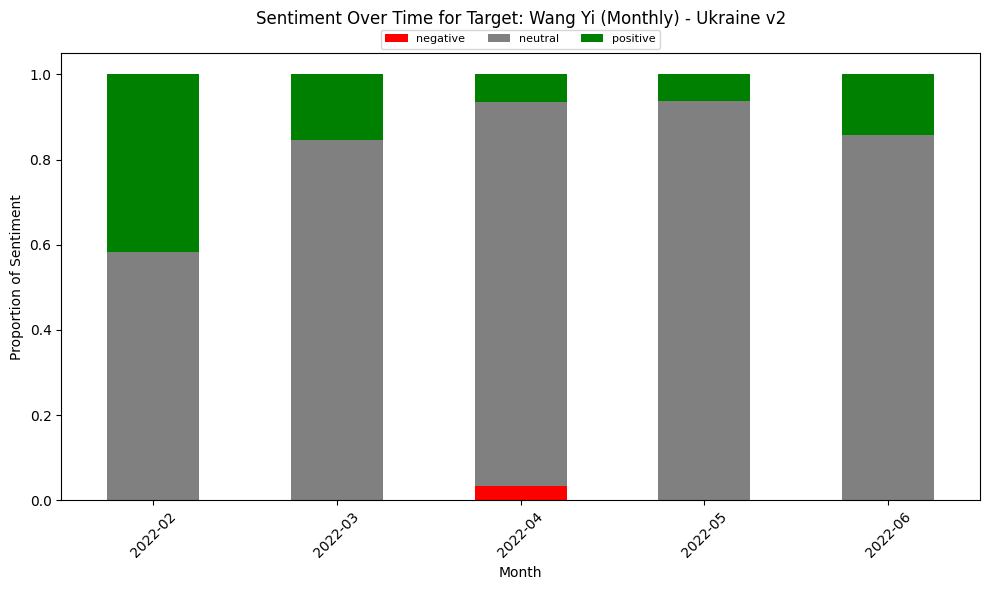

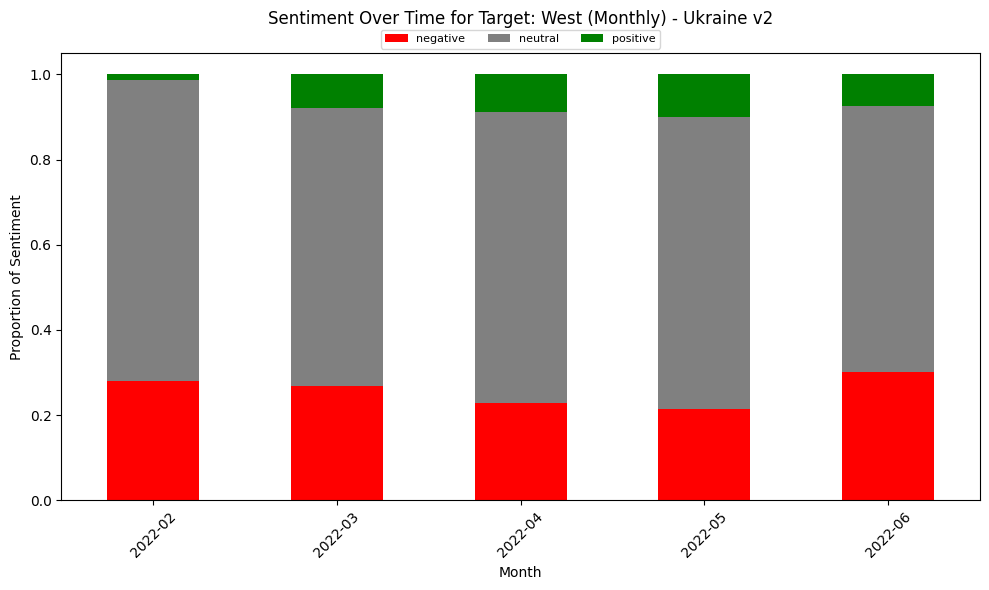

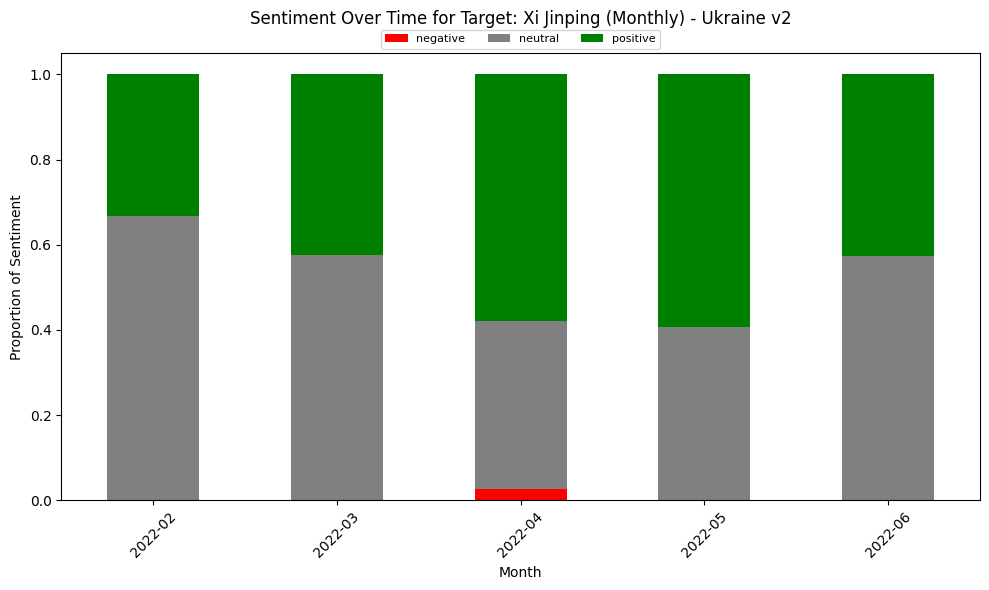

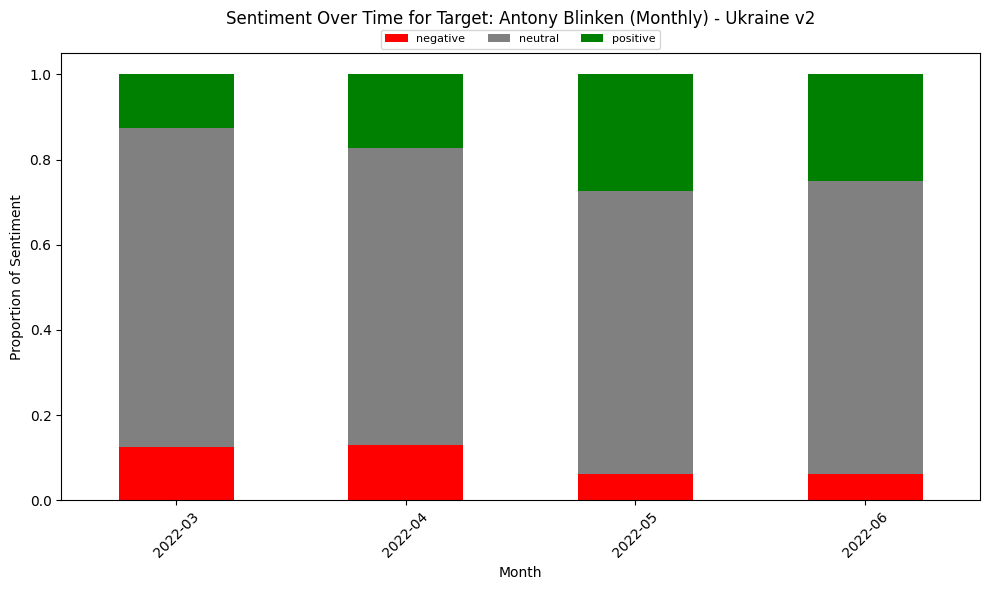

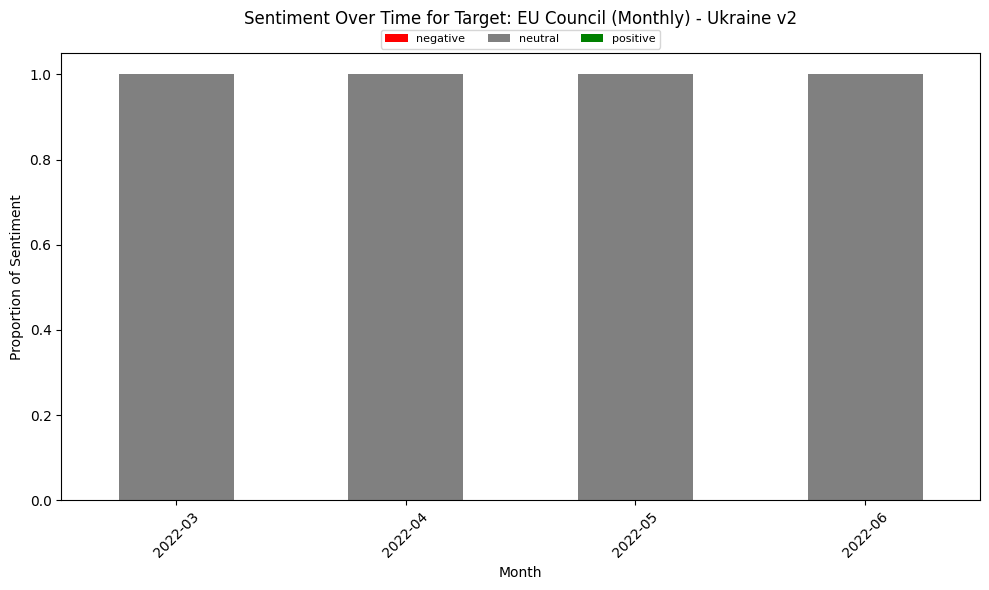

In [ ]:
#sentiment over time by target - monthly
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#group by month and target, count sentiment occurrences
sentiment_over_time = tsc_results_df.groupby(['month', 'Target', 'Sentiment']).size().unstack(fill_value=0)

#normalize to get sentiment proportions over time
sentiment_over_time_proportion = sentiment_over_time.div(sentiment_over_time.sum(axis=1), axis=0)

#plot sentiment over time for each target (monthly) using stacked bar chart
for target in sentiment_over_time_proportion.index.get_level_values('Target').unique():
    target_data = sentiment_over_time_proportion.xs(target, level='Target')

    months = target_data.index.astype(str)
    target_data.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], figsize=(10, 6))
    plt.title(f'Sentiment Over Time for Target: {target} (Monthly) - Ukraine v2\n')
    plt.xlabel('Month')
    plt.ylabel('Proportion of Sentiment')
    plt.xticks(rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.065), ncol=3, fontsize=8)
    plt.tight_layout()
    plt.show()

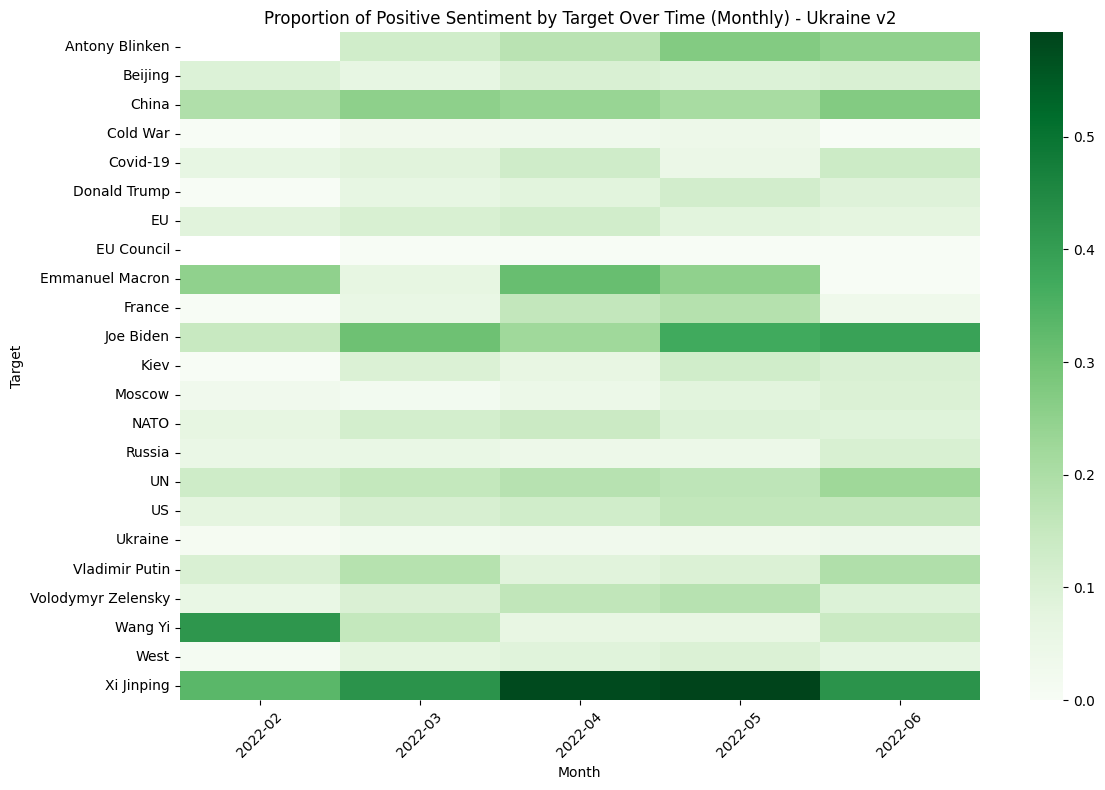

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'positive').mean())

#heatmap showing the proportion of positive sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greens', annot=False, cbar=True)
plt.title('Proportion of Positive Sentiment by Target Over Time (Monthly) - Ukraine v2')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

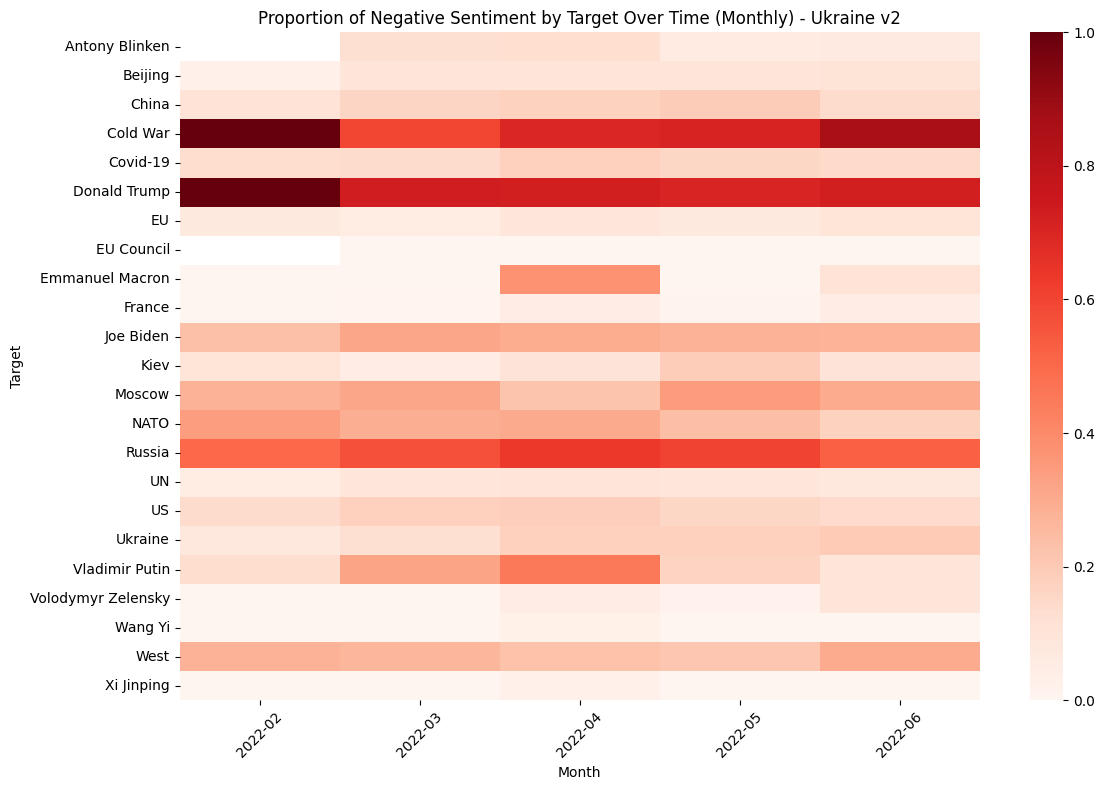

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'negative').mean())

#heatmap showing the proportion of negative sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Reds', annot=False, cbar=True)
plt.title('Proportion of Negative Sentiment by Target Over Time (Monthly) - Ukraine v2')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

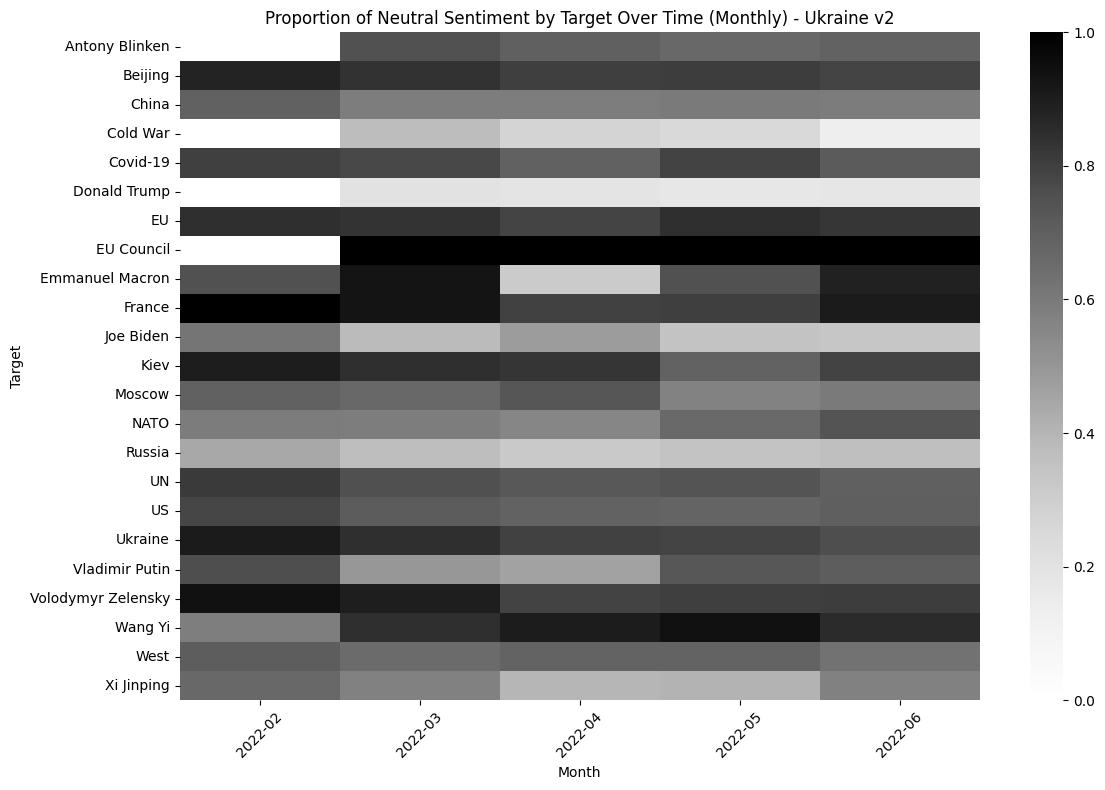

In [ ]:
tsc_results_df['published_time'] = pd.to_datetime(tsc_results_df['published_time'])
tsc_results_df['month'] = tsc_results_df['published_time'].dt.to_period('M')

#heatmap (target vs. month)
heatmap_data = tsc_results_df.pivot_table(index='Target', columns='month', values='Sentiment', aggfunc=lambda x: (x == 'neutral').mean())

#heatmap showing the proportion of neutral sentiment by target over time (monthly)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Greys', annot=False, cbar=True)
plt.title('Proportion of Neutral Sentiment by Target Over Time (Monthly) - Ukraine v2')
plt.xlabel('Month')
plt.ylabel('Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()